In this notebook I read the frequency differencing variables from ehcoview and categorise them.

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib as mpl
from matplotlib.dates import DateFormatter
from scipy import ndimage

import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import shapely.geometry as sgeom
from shapely.ops import transform as geom_transform

## Load data

In [2]:
fname1 = np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S18-Sv38.csv'))
fname2 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv120.csv'))
fname3 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv200.csv'))
fname4 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S120-Sv200.csv'))
fname5 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv70.csv'))
fname6 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*Resample by number of pings T2.csv'))

df_18_38 = pd.DataFrame()
df_38_120 = pd.DataFrame()
df_38_200 = pd.DataFrame()
df_120_200 = pd.DataFrame()
df_38_70 = pd.DataFrame()
df_38 = pd.DataFrame()

flist = [fname1, fname2, fname3, fname4, fname5, fname6]

for i_flist in range(len(flist)):
    df_all = pd.DataFrame()
    for ind in np.arange(len(flist[i_flist])):
        filename = flist[i_flist][ind]
        df =  pd.read_csv(filename, 
                            header=None,
                            skiprows=1,
                            engine='python')
        df_all = pd.concat([df_all, df])
        df_all.iloc[0:4,13:] = np.nan
        Sv_diff = df_all.iloc[:,13:].T
        Sv_diff.iloc[0:4,:] = np.nan
        
    if i_flist == 0:
        df_18_38 = df_all
        Sv18_38 = Sv_diff
        Sv18_38 = Sv18_38.T.reset_index(drop=True).T
    elif i_flist == 1:
        df_38_120 = df_all
        Sv38_120 = Sv_diff
        Sv38_120 = Sv38_120.T.reset_index(drop=True).T
    elif i_flist == 2:
        df_38_200 = df_all
        Sv38_200 = Sv_diff
        Sv38_200 = Sv38_200.T.reset_index(drop=True).T
    elif i_flist == 3:
        df_120_200 = df_all
        Sv120_200 = Sv_diff
        Sv120_200 = Sv120_200.T.reset_index(drop=True).T
    elif i_flist == 4:
        df_38_70 = df_all
        Sv38_70 = Sv_diff
        Sv38_70 = Sv38_70.T.reset_index(drop=True).T
    elif i_flist == 5:
        df_38 = df_all
        df_38= df_38.reset_index(drop=True)
        Sv38 = Sv_diff
        Sv38 = Sv38.T.reset_index(drop=True).T

        

## Get time array

In [3]:
dtimes_18_38 =[]
for ind in range(0,len(df_18_38)):
            dtimes_18_38 = np.append(dtimes_18_38, datetime.strptime('%s %s.%s' %(df_18_38[3].values[ind],df_18_38[4].values[ind],int(df_18_38[5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

In [4]:
dtimes_38 =[]
for ind in range(0,len(df_38)):
            dtimes_38 = np.append(dtimes_38, datetime.strptime('%s %s.%s' %(df_38[3].values[ind],df_38[4].values[ind],int(df_38[5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

### 120-200

In [5]:
dtimes_120_200 =[]
for ind in range(0,len(df_120_200)):
            dtimes_120_200 = np.append(dtimes_120_200 , datetime.strptime('%s %s.%s' %(df_120_200 [3].values[ind],df_120_200 [4].values[ind],int(df_120_200 [5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

C:\Users\murield\AppData\Local\Temp\ipykernel_21084\1184265348.py:14: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_21084\1184265348.py:21: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_21084\1184265348.py:28: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_

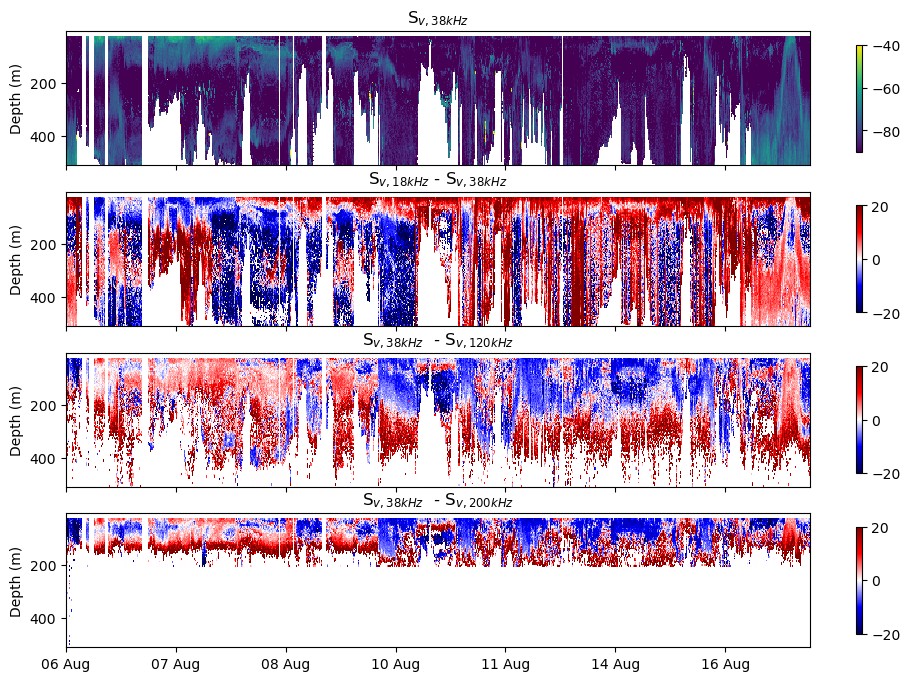

In [6]:
depth_cells = np.linspace(0,500,100)+7 # plus 7 for transducer depth

mask_Sv18_38 = Sv18_38.where(~(Sv18_38<-900) & ~(Sv18_38>900))
mask_Sv38_120 = Sv38_120.where(~(Sv38_120<-900) & ~(Sv38_120>900))
mask_Sv38_200 = Sv38_200.where(~(Sv38_200<-900) & ~(Sv38_200>900))
mask_Sv38 = Sv38.where(~(Sv38<-900) & ~(Sv38>900))
Sv38 = Sv38.where(~(Sv38<-900) & ~(Sv38>900))


fig,axes = plt.subplots(4,1, figsize=(12,8))
ax = axes.flatten()

ax_sv = ax[0].pcolor(np.arange(np.shape(mask_Sv38)[1]), depth_cells, mask_Sv38 , vmin=-90, vmax=-40, cmap=mpl.colormaps['viridis'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[0].invert_yaxis()
ax[0].set_xticklabels([])
ax[0].set_title('S$_{v,38kHz}$ ')
ax[0].set_ylabel('Depth (m)')

ax_sv = ax[1].pcolor(np.arange(np.shape(mask_Sv18_38)[1]), depth_cells, mask_Sv18_38 , vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[1].invert_yaxis()
ax[1].set_xticklabels([])
ax[1].set_title('S$_{v,18kHz}$ - S$_{v,38kHz}$ ')
ax[1].set_ylabel('Depth (m)')

ax_sv = ax[2].pcolor(np.arange(np.shape(mask_Sv38_120)[1]), depth_cells, mask_Sv38_120, vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[2].invert_yaxis()
ax[2].set_xticklabels([])
ax[2].set_title('S$_{v,38kHz}$  - S$_{v,120kHz}$ ')
ax[2].set_ylabel('Depth (m)')

ax_sv = ax[3].pcolor(np.arange(np.shape(mask_Sv38_200)[1]), depth_cells, mask_Sv38_200, vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[3].invert_yaxis()
ax[3].set_xticklabels([dtimes_18_38[0].strftime('%d %b'),
                       dtimes_18_38[0].strftime('%d %b'),
                       dtimes_18_38[2000].strftime('%d %b'),
                       dtimes_18_38[4000].strftime('%d %b'),
                       dtimes_18_38[6000].strftime('%d %b'),
                       dtimes_18_38[8000].strftime('%d %b'),
                       dtimes_18_38[10000].strftime('%d %b'),
                       dtimes_18_38[12000].strftime('%d %b')
                      ])
ax[3].set_title('S$_{v,38kHz}$  - S$_{v,200kHz}$')
ax[3].set_ylabel('Depth (m)')
fig.savefig('D:/Sermilik/Figs/dBDiff_timeseries.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Euphausiids

In [7]:
EuphA=-10; EuphAsd=3.4
EuphA1 = Sv18_38>(EuphA-EuphAsd)
EuphA2 = Sv18_38<(EuphA+EuphAsd)
EuphausiidsA = Sv18_38.where(EuphA1 & EuphA2)

EuphB = -13.8; EuphBsd=2.9
EuphB1 = Sv38_120>(EuphB-EuphBsd)
EuphB2 = Sv38_120<(EuphB+EuphBsd)
EuphausiidsB = Sv18_38.where(EuphB1 & EuphB2)

EuphC = -16.3; EuphCsd=2.9
EuphC1 = Sv38_200>(EuphC-EuphCsd)
EuphC2 = Sv38_200<(EuphC+EuphCsd)
EuphausiidsC = Sv18_38.where(EuphC1 & EuphC2)

EuphD = -9.5; EuphDsd=4
EuphD1 = Sv38_70>(EuphD-EuphDsd)
EuphD2 = Sv38_70<(EuphD+EuphDsd)
EuphausiidsD = Sv18_38.where(EuphD1 & EuphD2)

Euphausiids = EuphausiidsB.where(~np.isnan(EuphausiidsC) & ~np.isnan(EuphausiidsD))

Euphausiids_38 = Sv38.where(~np.isnan(Euphausiids))

## Jellyfish

In [8]:
JellyA=8.2; JellyAsd=1.5
JellyA1 = Sv18_38>(JellyA-JellyAsd)
JellyA2 = Sv18_38<(JellyA+JellyAsd)
JellyfishA = Sv18_38.where(JellyA1 & JellyA2)

JellyB = 2.1; JellyBsd=1.2
JellyB1 = Sv38_120>(JellyB-JellyBsd)
JellyB2 = Sv38_120<(JellyB+JellyBsd)
JellyfishB = Sv18_38.where(JellyB1 & JellyB2)

JellyC = 2.2; JellyCsd=1.3
JellyC1 = Sv38_200>(JellyC-JellyCsd)
JellyC2 = Sv38_200<(JellyC+JellyCsd)
JellyfishC = Sv18_38.where(JellyC1 & JellyC2)

Jellyfish = JellyfishA.where(~np.isnan(JellyfishB) & ~np.isnan(JellyfishC))

Jellyfish_38 = Sv38.where(~np.isnan(Jellyfish))

## Non-Swimbladdered
Following Eulachon category

In [9]:
EulaA=1.2; EulaAsd=3.2
EulaA1 = Sv18_38>(EulaA-EulaAsd)
EulaA2 = Sv18_38<(EulaA+EulaAsd)
EulachonA = Sv18_38.where(EulaA1 & EulaA2)

EulaB = -5.8; EulaBsd=2.8
EulaB1 = Sv38_120>(EulaB-EulaBsd)
EulaB2 = Sv38_120<(EulaB+EulaBsd)
EulachonB = Sv18_38.where(EulaB1 & EulaB2)

EulaC = 3.1; EulaCsd=2.5
EulaC1 = Sv38_200>(EulaC-EulaCsd)
EulaC2 = Sv38_200<(EulaC+EulaCsd)
EulachonC = Sv18_38.where(EulaC1 & EulaC2)

Eulachon = EulachonA.where(~np.isnan(EulachonB) & ~np.isnan(EulachonC))

Eulachon_38 = Sv38.where(~np.isnan(Eulachon))

## Capelin

In [10]:
CapA=2.7; CapAsd=2.8
CapA1 = Sv18_38>(CapA-CapAsd)
CapA2 = Sv18_38<(CapA+CapAsd)
CapelinA = Sv18_38.where(CapA1 & CapA2)

CapB = 3.8; CapBsd=1.7
CapB1 = Sv38_120>(EulaB-EulaBsd)
CapB2 = Sv38_120<(EulaB+EulaBsd)
CapelinB = Sv18_38.where(CapB1 & CapB2)

CapC = 3.6; CapCsd=1.8
CapC1 = Sv38_200>(CapC-CapCsd)
CapC2 = Sv38_200<(CapC+CapCsd)
CapelinC = Sv18_38.where(CapC1 & CapC2)

Capelin = CapelinA.where(~np.isnan(CapelinB) & ~np.isnan(CapelinC))

Capelin_38 = Sv38.where(~np.isnan(Capelin))

## Myctophids

In [11]:
MycA = -15; MycAsd = 1.8
MycA1 = Sv18_38>(MycA-MycAsd)
MycA2 = Sv18_38<(MycA+MycAsd)
MyctophidsA = Sv18_38.where(MycA1 & MycA2)

MycB = 9.2; MycBsd = 1
MycB1 = Sv38_120>(MycB-MycBsd)
MycB2 = Sv38_120<(MycB+MycBsd)
MyctophidsB = Sv18_38.where(MycB1 & MycB2)

Myctophids = MyctophidsA.where(~np.isnan(MyctophidsB))

Myctophids_38 = Sv38.where(~np.isnan(Myctophids))

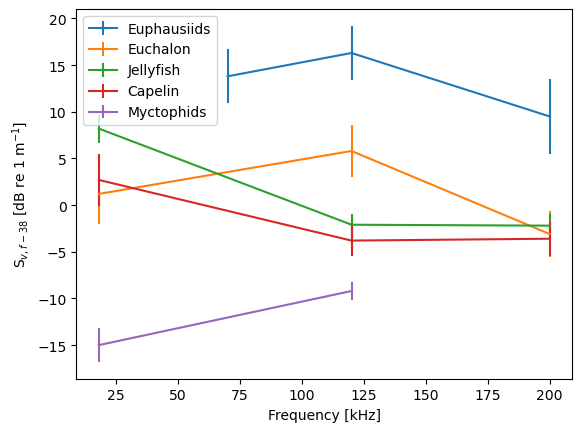

In [12]:
fig = plt. figure()
plt.errorbar([70,120,200], [ -EuphB, -EuphC, -EuphD], yerr=[ EuphBsd, EuphCsd, EuphDsd], label='Euphausiids')
plt.errorbar([18,120, 200], [EulaA, -EulaB, -EulaC], yerr=[EulaAsd, EulaBsd, EulaCsd], label='Euchalon')
plt.errorbar([18,120, 200], [JellyA, -JellyB, -JellyC], yerr=[JellyAsd, JellyBsd, JellyCsd], label='Jellyfish')
plt.errorbar([18,120, 200], [CapA, -CapB, -CapC], yerr=[CapAsd, CapBsd, CapCsd], label='Capelin')
plt.errorbar([18,120], [MycA, -MycB], yerr=[MycAsd, MycBsd], label='Myctophids')
plt.legend()
plt.xlabel('Frequency [kHz]')
plt.ylabel('S$_{v, f-38}$ [dB re 1 m$^{-1}$]')

fig.savefig('D:/Sermilik/Figs/dBDiff_categories.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

C:\Users\murield\AppData\Local\Temp\ipykernel_21084\2431572016.py:7: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  ax[0].pcolor(dtimes_18_38, depth_cells, Myctophids_38)
C:\Users\murield\AppData\Local\Temp\ipykernel_21084\2431572016.py:11: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  ax[1].pcolor(dtimes_18_38, depth_cells, Capelin_38)
C:\Users\murield\AppData\Local\Temp\ipykernel_21084\2431572016.py:16: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case,

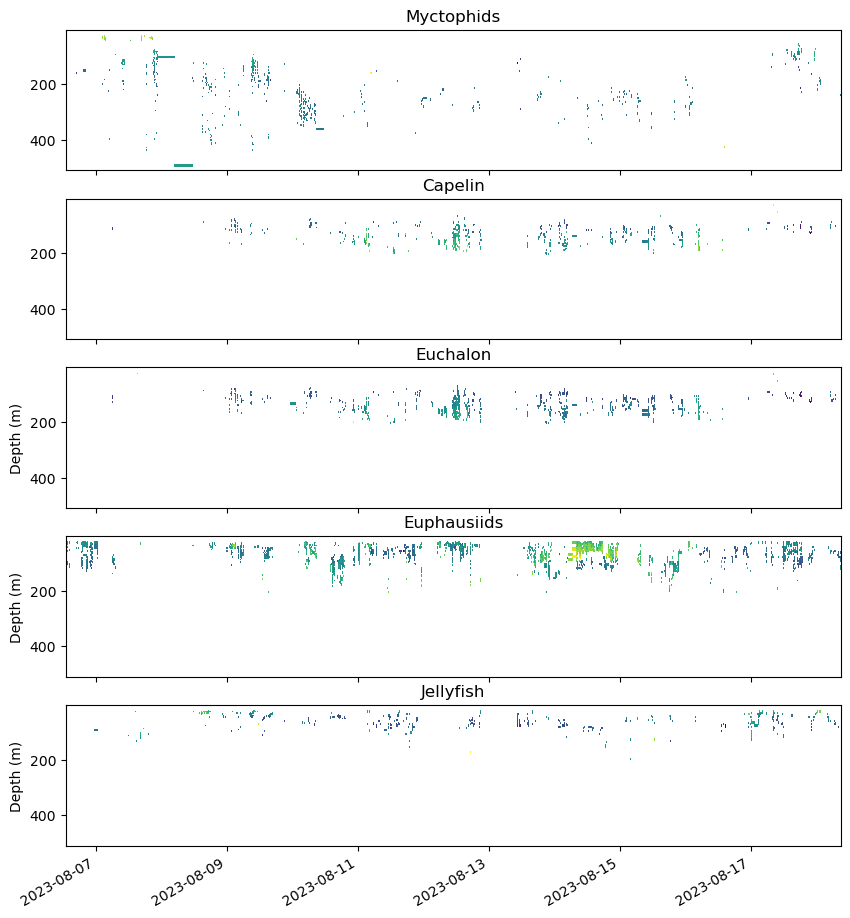

In [13]:
GPS_dist = Sv18_38[1]

fig,axes = plt.subplots(5,1, figsize=(10,12))
ax = axes.flatten()


ax[0].pcolor(dtimes_18_38, depth_cells, Myctophids_38)
ax[0].invert_yaxis()
ax[0].set_title('Myctophids')

ax[1].pcolor(dtimes_18_38, depth_cells, Capelin_38)
ax[1].invert_yaxis()
ax[1].set_title('Capelin')
plt.gcf().autofmt_xdate()

ax[2].pcolor(dtimes_18_38, depth_cells, Eulachon_38)
ax[2].invert_yaxis()
ax[2].set_title('Euchalon')
ax[2].set_ylabel('Depth (m)')

ax[3].pcolor(dtimes_18_38, depth_cells, Euphausiids_38)
ax[3].invert_yaxis()
ax[3].set_title('Euphausiids')
ax[3].set_ylabel('Depth (m)')

ax[4].pcolor(dtimes_18_38, depth_cells, Jellyfish_38)
ax[4].invert_yaxis()
ax[4].set_title('Jellyfish')
ax[4].set_ylabel('Depth (m)')
plt.gcf().autofmt_xdate()

## Vertical profiles

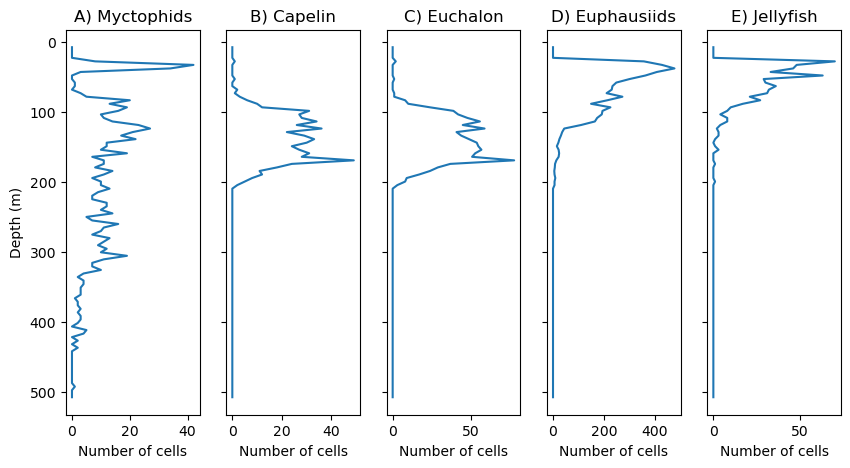

In [14]:
fig,axes = plt.subplots(1,5, figsize=(10,5), sharey=True)
ax = axes.flatten()


ax[0].plot(np.sum(~np.isnan(Myctophids_38),axis=1), depth_cells)
ax[0].invert_yaxis()
ax[0].set_title('A) Myctophids')
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Number of cells')


ax[1].plot(np.sum(~np.isnan(Capelin_38),axis=1), depth_cells)
ax[1].invert_yaxis()
ax[1].set_title('B) Capelin')
ax[1].set_xlabel('Number of cells')

ax[2].plot(np.sum(~np.isnan(Eulachon_38),axis=1), depth_cells)
ax[2].invert_yaxis()
ax[2].set_title('C) Euchalon')
ax[2].set_xlabel('Number of cells')


ax[3].plot(np.sum(~np.isnan(Euphausiids_38),axis=1), depth_cells)
ax[3].invert_yaxis()
ax[3].set_title('D) Euphausiids')
ax[3].set_xlabel('Number of cells')


ax[4].plot(np.sum(~np.isnan(Jellyfish_38),axis=1), depth_cells)
ax[4].invert_yaxis()
ax[4].set_title('E) Jellyfish')
ax[4].set_xlabel('Number of cells')

fig.savefig('D:/Sermilik/Figs/Vertical_profiles.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Calculate NASC

In [15]:
myc_sv = 10**(Myctophids_38/10)
cap_sv = 10**(Capelin_38/10)
eula_sv = 10**(Eulachon_38/10)
euph_sv = 10**(Euphausiids_38/10)
jelly_sv = 10**(Jellyfish_38/10)

In [16]:
# Depth is determine by the deepest cell with a value (adjusted to cell parameters, 12 index and 5m)
depth = (Sv38.apply(lambda series: series.last_valid_index())-12)*5

In [17]:
depth_shallow = depth.copy()
filter = depth_shallow>200
depth_shallow[filter] = 200

In [18]:
NASC_myc = 4*np.pi*1852*1852*np.sum(myc_sv, axis=0)/((depth-20)/5) # Depth because we use the whole water column - 15 m at surface
NASC_cap = 4*np.pi*1852*1852*np.sum(cap_sv, axis=0)/((depth_shallow-20)/5)
NASC_eula = 4*np.pi*1852*1852*np.sum(eula_sv, axis=0)/((depth_shallow-20)/5)
NASC_euph = 4*np.pi*1852*1852*np.sum(euph_sv, axis=0)/((depth_shallow-20)/5)
NASC_jelly = 4*np.pi*1852*1852*np.sum(jelly_sv, axis=0)/((depth_shallow-20)/5)

In [19]:
#NASC_myc = 4*np.pi*1852*1852*np.mean(myc_sv, axis=0) # Just for cells counted..
#NASC_cap = 4*np.pi*1852*1852*np.mean(cap_sv, axis=0)
#NASC_eula = 4*np.pi*1852*1852*np.mean(eula_sv, axis=0)
#NASC_euph = 4*np.pi*1852*1852*np.mean(euph_sv, axis=0)
#NASC_jelly = 4*np.pi*1852*1852*np.mean(jelly_sv, axis=0)

## Prepare for maps

In [20]:
lats = df_38[6]
lons = df_38[7]

lat_lim = [np.min(lats), np.max(lats)]
lon_lim = [np.min(lons), np.max(lons)]

In [21]:
distance_nmi = df_38[2]-df_38.iloc[0,2]

In [22]:
dist_10 = (distance_nmi/10).round().astype(int)

In [23]:
lats_10 = np.empty([np.max(dist_10)])
lons_10 = np.empty([np.max(dist_10)])
myc_10 = np.empty([np.max(dist_10)])
cap_10 = np.empty([np.max(dist_10)])
eula_10 = np.empty([np.max(dist_10)])
euph_10 = np.empty([np.max(dist_10)])
jelly_10 = np.empty([np.max(dist_10)])


for i in range(np.max(dist_10)):
    ind = dist_10 == i
    lats_10[i] = np.mean(lats[ind])
    lons_10[i] = np.mean(lons[ind])
    myc_10[i] = np.mean(NASC_myc[ind])
    cap_10[i] = np.mean(NASC_cap[ind])
    eula_10[i] = np.mean(NASC_eula[ind])
    euph_10[i] = np.mean(NASC_euph[ind])
    jelly_10[i] = np.mean(NASC_jelly[ind])

## Maps

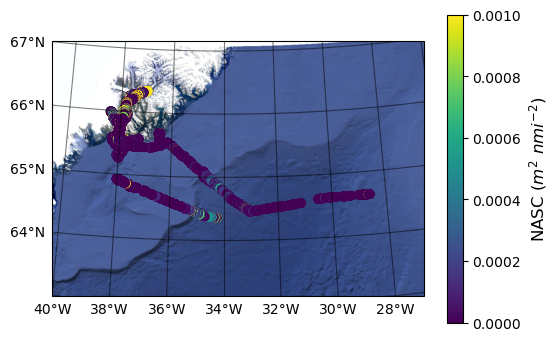

In [24]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -27, 63 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons, lats, c= NASC_euph, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.001])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)


#ig.savefig('D:/Sermilik/Figs/Map_mycs', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

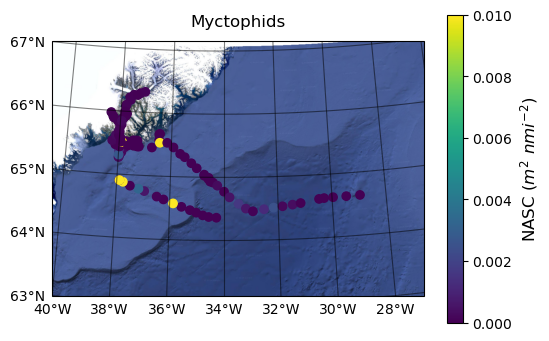

In [38]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -27, 63 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=myc_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Myctophids')


fig.savefig('D:/Sermilik/Figs/Map_myc', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

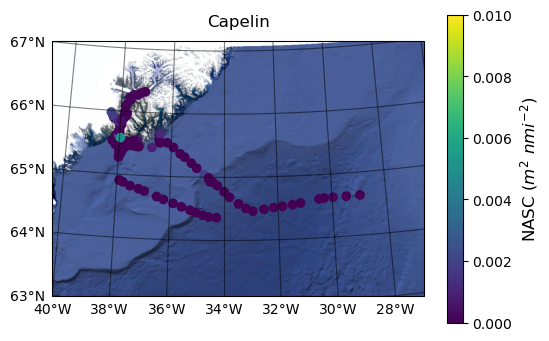

In [39]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -27, 63 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=cap_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Capelin')


fig.savefig('D:/Sermilik/Figs/Map_cap', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

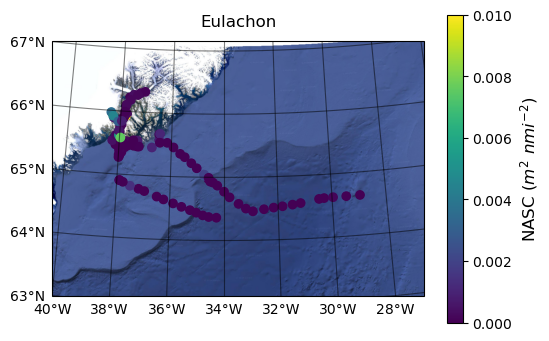

In [40]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -27, 63 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=eula_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Eulachon')


fig.savefig('D:/Sermilik/Figs/Map_eula', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

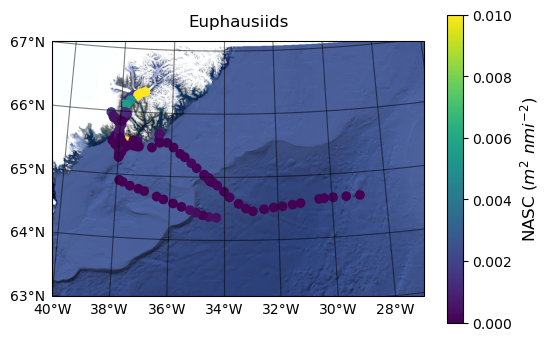

In [41]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -27, 63 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=euph_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Euphausiids')


fig.savefig('D:/Sermilik/Figs/Map_euph', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

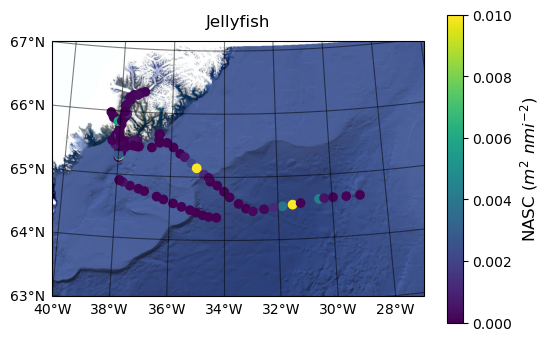

In [42]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -27, 63 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=jelly_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Jellyfish')


fig.savefig('D:/Sermilik/Figs/Map_jelly', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

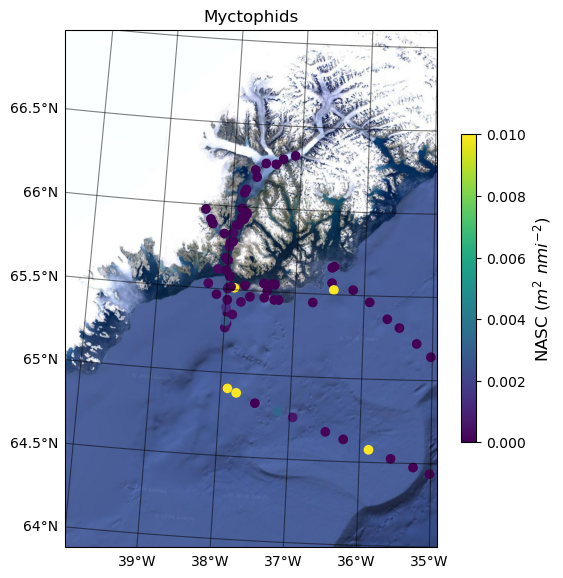

In [50]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -35, 64 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=myc_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Myctophids')


fig.savefig('D:/Sermilik/Figs/Map_zoom_myc', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

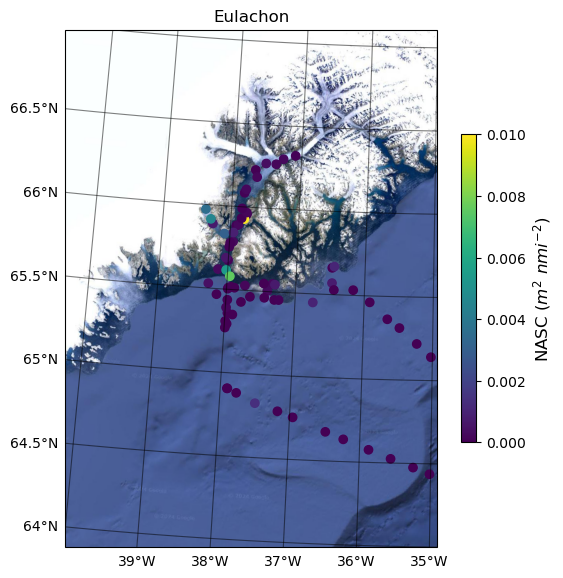

In [44]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -35, 64 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=eula_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Eulachon')


fig.savefig('D:/Sermilik/Figs/Map_zoom_eula', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

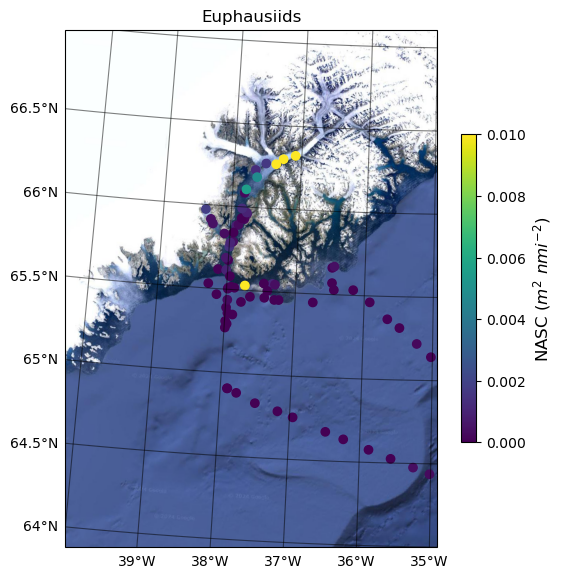

In [45]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -35, 64 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=euph_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Euphausiids')


fig.savefig('D:/Sermilik/Figs/Map_zoom_euph', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

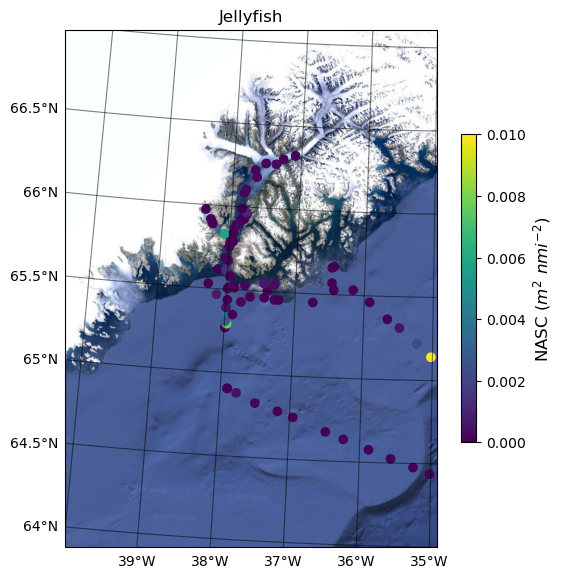

In [46]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[-40, -35, 64 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons_10, lats_10, c=jelly_10, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
# Consistent cbar
ax_s.set_clim([0,0.01])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
plt.title('Jellyfish')


fig.savefig('D:/Sermilik/Figs/Map_zoom_jelly', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

# Center of mass

In [27]:
d_myc = ndimage.center_of_mass(np.mean(myc_sv,axis=1))
d_cap = ndimage.center_of_mass(np.mean(cap_sv,axis=1))
d_eula = ndimage.center_of_mass(np.mean(eula_sv,axis=1))
d_euph = ndimage.center_of_mass(np.mean(euph_sv,axis=1))
d_jelly = ndimage.center_of_mass(np.mean(jelly_sv,axis=1))



In [36]:
d_cap

(14.0681469170969,)

In [47]:
cm_myc = depth_cells[np.round(d_myc)[0].astype(int)]
cm_cap = depth_cells[np.round(d_cap)[0].astype(int)]
cm_eula = depth_cells[np.round(d_eula)[0].astype(int)]
cm_euph = depth_cells[np.round(d_euph)[0].astype(int)]
cm_jelly = depth_cells[np.round(d_jelly)[0].astype(int)]

In [48]:
print(cm_myc,cm_cap,cm_eula,cm_euph,cm_jelly)

108.01010101010101 77.7070707070707 108.01010101010101 113.06060606060605 148.4141414141414


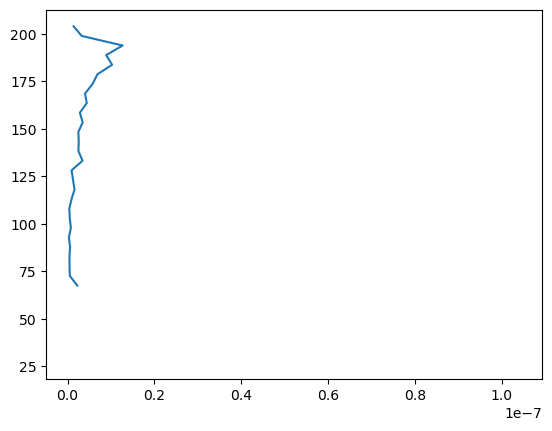

In [37]:
plt.plot( np.mean(cap_sv,axis=1), depth_cells)

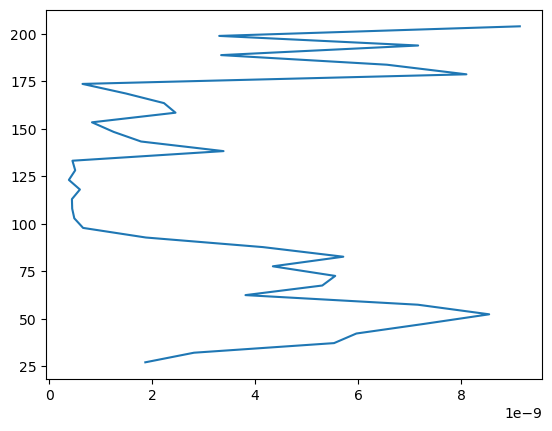

In [35]:
plt.plot( np.mean(10**(Euphausiids_38/10),axis=1), depth_cells)